In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
def load_img():
    img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, "ABCDE", (50,300), font, 5, (255,255,255), 25)
    return img

In [8]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

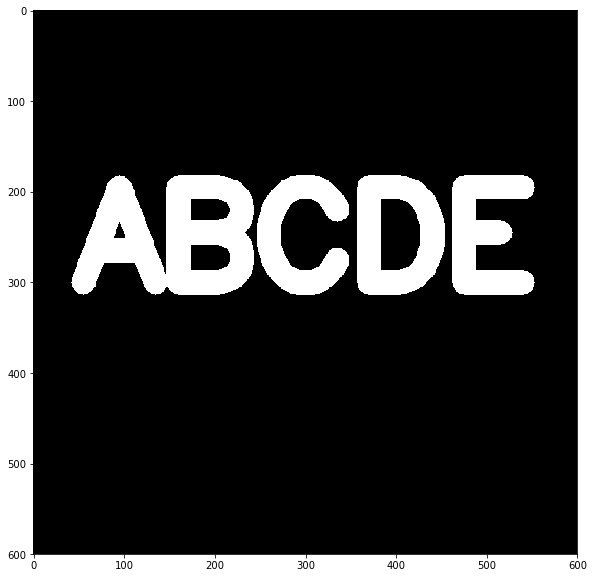

In [21]:
img = load_img()
display_img(img)

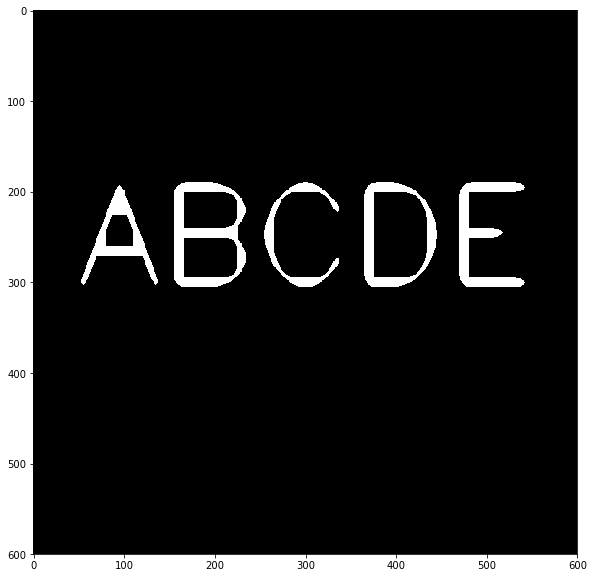

In [22]:
# Erosion -> erodes boundaries of foreground objects
kernel = np.ones((5,5), dtype=np.uint8)
dst = cv2.erode(img, kernel, iterations=4)
display_img(dst)

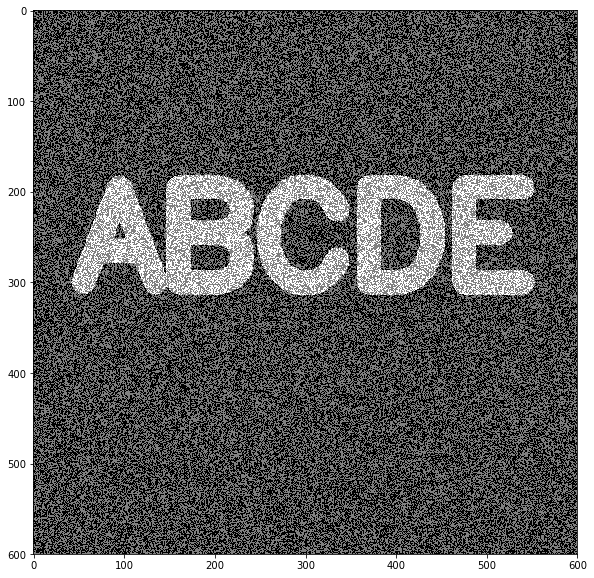

In [30]:
# Dilation -> opposite of erosion
# Opening -> Erosion followed by dilation. It can be helpful in removing background noise

# Adding noise to image
img = load_img()
white_noise = np.random.randint(0,2,(600,600))
white_noise = white_noise * 255
noise_img = white_noise + img
display_img(noise_img)

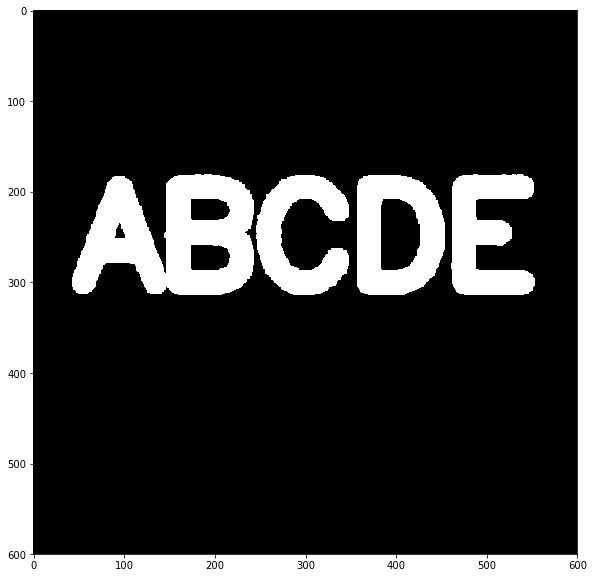

In [31]:
# Opening
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

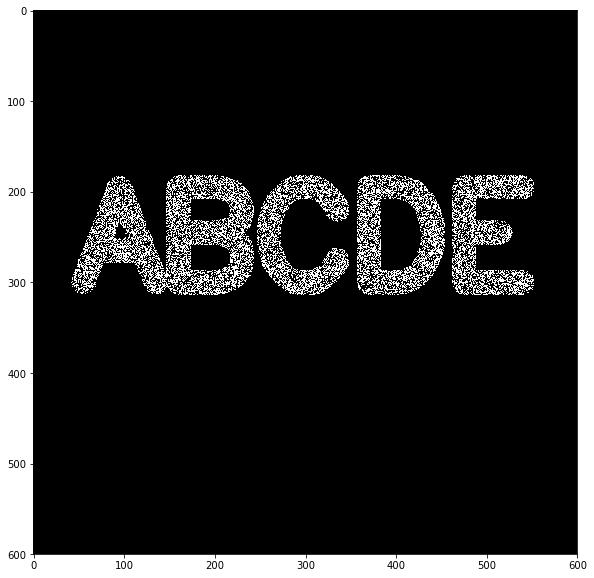

In [32]:
img = load_img()
black_noise = np.random.randint(0,2,(600,600))
black_noise = black_noise * -255
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0
display_img(black_noise_img)

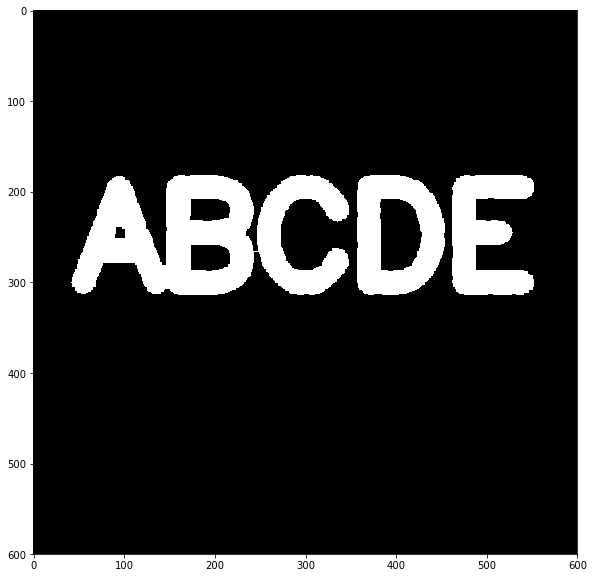

In [33]:
# Closing -> dilation followed by erosion

closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

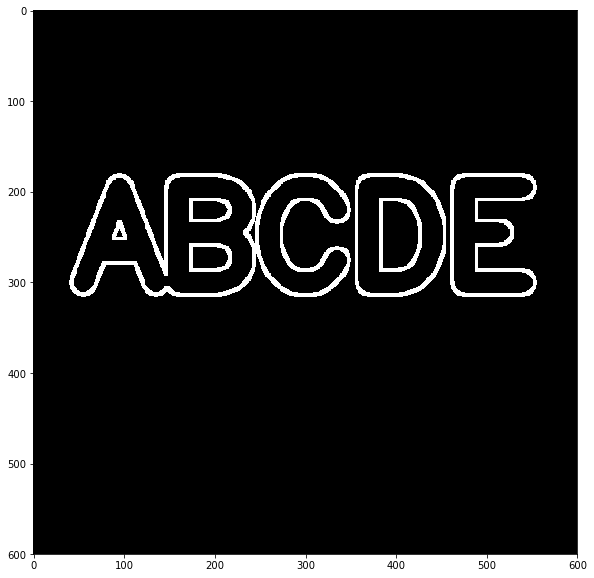

In [34]:
# Morphological gradient. Takes the difference between dilation and erosion of image
# Crude edge detection
img = load_img()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)